# Bab 9: Unsupervised Learning (Pembelajaran Tanpa Supervisi)

### 1. Pendahuluan

Bab 9 membahas *Unsupervised Learning*, sebuah cabang dari *Machine Learning* di mana algoritma belajar dari data yang tidak memiliki label. Berbeda dengan *Supervised Learning*, tujuannya bukanlah untuk memprediksi target, melainkan untuk menemukan struktur atau pola tersembunyi di dalam data itu sendiri.

Bab ini secara khusus berfokus pada:
* **Clustering:** Tugas mengelompokkan data ke dalam beberapa grup (*cluster*) di mana *instance* dalam satu grup memiliki kemiripan satu sama lain.
    * **K-Means:** Algoritma clustering yang cepat dan sederhana.
    * **DBSCAN:** Algoritma berbasis kepadatan yang mampu menemukan cluster dengan bentuk yang kompleks.
* **Gaussian Mixture Models (GMM):** Model probabilistik yang mengasumsikan bahwa data dihasilkan dari campuran beberapa distribusi Gaussian dengan parameter yang berbeda. GMM sangat baik untuk *density estimation*, *clustering*, dan *anomaly detection*.

---

### 2. Clustering

*Clustering* adalah teknik untuk mengidentifikasi dan mengelompokkan *instance* yang serupa. Ini sangat berguna untuk:
* **Segmentasi Pelanggan:** Mengelompokkan pelanggan berdasarkan perilaku pembelian mereka.
* **Reduksi Dimensi:** Mengukur kemiripan *instance* dengan *centroid cluster* dapat menjadi fitur baru yang berdimensi lebih rendah.
* **Deteksi Anomali:** *Instance* yang tidak cocok dengan *cluster* mana pun dapat dianggap sebagai anomali.
* **Pra-pemrosesan:** *Clustering* dapat digunakan sebagai langkah awal sebelum melatih model *supervised learning*.

#### a. K-Means
K-Means adalah algoritma yang sangat populer karena kesederhanaan dan kecepatannya. Algoritma ini mencoba mempartisi dataset menjadi *K* *cluster* yang berbeda (di mana *K* adalah *hyperparameter* yang ditentukan pengguna).

**Proses Pelatihan K-Means:**
1.  **Inisialisasi:** *Centroid* (pusat *cluster*) dipilih secara acak.
2.  **Penugasan:** Setiap *instance* ditetapkan ke *cluster* dengan *centroid* terdekat.
3.  **Pembaruan:** Posisi *centroid* diperbarui menjadi rata-rata dari semua *instance* yang ditugaskan ke *cluster* tersebut.
4.  Langkah 2 dan 3 diulang hingga *centroid* tidak lagi berubah.

**Inertia:** Metrik yang digunakan K-Means adalah *inertia*, yaitu jumlah kuadrat jarak antara setiap *instance* dan *centroid* terdekatnya.
$$I = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} ||\mathbf{x} - \boldsymbol{\mu}_i||^2$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Membuat dataset blob
blob_centers = np.array(
    [[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

# Melatih model K-Means dengan K=5
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
y_pred = kmeans.fit_predict(X)

# Menampilkan centroid dan label prediksi
print("Centroids:\n", kmeans.cluster_centers_)
print("\nContoh prediksi label:", y_pred[:5])

Centroids:
 [[-0.066884    2.10378803]
 [-2.79290307  2.79641063]
 [-2.80214068  1.55162671]
 [-1.47468607  2.28399066]
 [ 0.47042841  2.41380533]]

Contoh prediksi label: [2 2 4 2 2]


c:\Users\Khalif Prawira\AppData\Local\Programs\Orange\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Khalif Prawira\AppData\Local\Programs\Orange\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Khalif Prawira\AppData\Local\Programs\Orange\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Khalif Prawira\AppData\Local\Programs\Orange\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File

### b. Menemukan Jumlah Cluster Optimal (K)
Salah satu tantangan utama K-Means adalah memilih nilai K yang tepat.

* Metode Siku (Elbow Method): Plot inertia sebagai fungsi dari K. Biasanya, inertia akan turun dengan cepat dan kemudian melambat, membentuk "siku". Titik siku ini seringkali merupakan pilihan K yang baik.
* Skor Silhouette (Silhouette Score): Menghitung rata-rata koefisien silhouette dari semua instance. Koefisien silhouette mengukur seberapa baik sebuah instance cocok dengan cluster-nya sendiri dibandingkan dengan cluster lain. Skor ini berkisar dari -1 hingga 1. Semakin dekat ke 1, semakin baik.

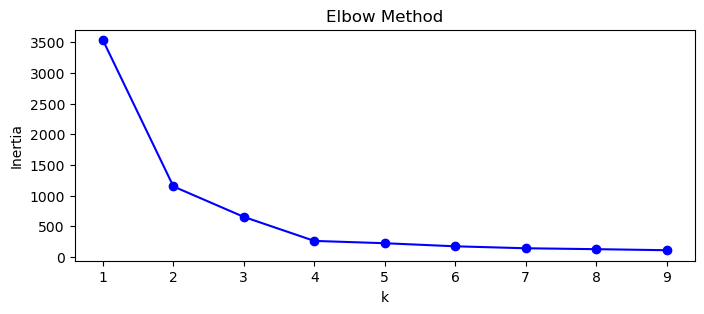

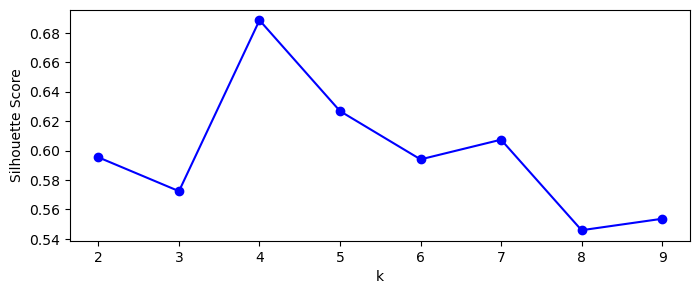

In [4]:
from sklearn.metrics import silhouette_score

# Menghitung inertia dan silhouette score untuk berbagai nilai K
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

# Plot Inertia (Elbow Method)
plt.figure(figsize=(8, 3))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.show()

Dari plot di atas, baik metode siku (sekitar K=4) maupun skor silhouette (puncak di K=4) menunjukkan bahwa 4 adalah pilihan jumlah cluster yang baik.

### c. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN adalah algoritma berbasis kepadatan yang dapat menemukan cluster dengan bentuk yang tidak beraturan. Ia bekerja dengan mendefinisikan cluster sebagai wilayah padat yang dipisahkan oleh wilayah dengan kepadatan rendah.

* Hyperparameter Utama:
    * eps: Jarak maksimum di sekitar setiap instance untuk dianggap sebagai tetangga.
    * min_samples: Jumlah minimum instance dalam lingkungan eps agar sebuah instance dianggap sebagai core instance.
DBSCAN mengklasifikasikan setiap instance sebagai:

1. Core instance: Instance yang memiliki setidaknya min_samples tetangga di dalam radius eps.
2. Border instance: Instance yang bukan core tetapi berada dalam jangkauan eps dari core instance.
3. Noise/Outlier: Instance yang bukan core maupun border.

In [5]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Membuat dataset moons yang tidak dapat dipisahkan secara linier
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Melatih DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

# Label -1 menunjukkan instance yang dianggap noise
print("Contoh label DBSCAN:", dbscan.labels_[:10])

Contoh label DBSCAN: [0 0 0 0 1 0 0 0 0 1]


---

### 3. Gaussian Mixture Models (GMM)
GMM adalah model probabilistik yang mengasumsikan data dihasilkan dari campuran beberapa distribusi Gaussian. Setiap cluster sesuai dengan satu distribusi Gaussian.
* **Expectation-Maximization (EM)**: GMM dilatih menggunakan algoritma EM. Algoritma ini secara iteratif mencoba memperkirakan parameter distribusi Gaussian (rata-rata, kovarians, bobot) dan menetapkan instance ke cluster.
* **Soft Clustering**: Berbeda dengan K-Means yang melakukan hard assignment, GMM melakukan soft assignment, yaitu memberikan probabilitas setiap instance termasuk dalam setiap cluster.

In [6]:
from sklearn.mixture import GaussianMixture

# Melatih model GMM
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X) # Menggunakan dataset moons dari contoh DBSCAN

# Menampilkan parameter yang dipelajari
print("Bobot (Weights):", gm.weights_)
print("Rata-rata (Means):\n", gm.means_)

Bobot (Weights): [0.58665595 0.20291052 0.21043353]
Rata-rata (Means):
 [[ 0.49067581  0.2579044 ]
 [-0.74886394  0.5549146 ]
 [ 1.72666283 -0.07241745]]


### a. Deteksi Anomali dengan GMM
GMM juga dapat digunakan untuk deteksi anomali. Instance yang berada di wilayah dengan kepadatan rendah (jauh dari pusat distribusi Gaussian mana pun) kemungkinan besar adalah anomali. Kita dapat menggunakan metode score_samples() untuk memperkirakan kepadatan log di lokasi instance.

### b. Memilih Jumlah Cluster (Komponen)
Untuk memilih jumlah komponen yang tepat untuk GMM, kita tidak bisa menggunakan inertia atau silhouette score karena GMM tidak memiliki batas cluster yang jelas. Sebagai gantinya, digunakan kriteria informasi teoritis seperti:
* Bayesian Information Criterion (BIC): $BIC = \log(m)p - 2\log(\hat{L})$
* Akaike Information Criterion (AIC): $AIC = 2p - 2\log(\hat{L})$

Kita memilih model yang memiliki BIC atau AIC terendah.